<a href="https://colab.research.google.com/github/mattbowman2/notebooks/blob/main/notebooks/colab/01_consulting/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Professional Service Simulation

Aim: I want to see if I can model a professional service firm, so I can do what if scenarios or trial different metrics.

## Trying to Model The RFP Frequency

[11.63575603 -2.72421463  4.07503393  1.20082255 -8.30926245 15.3484178
  6.38863427  3.89318711 -9.40615919  3.14024278]


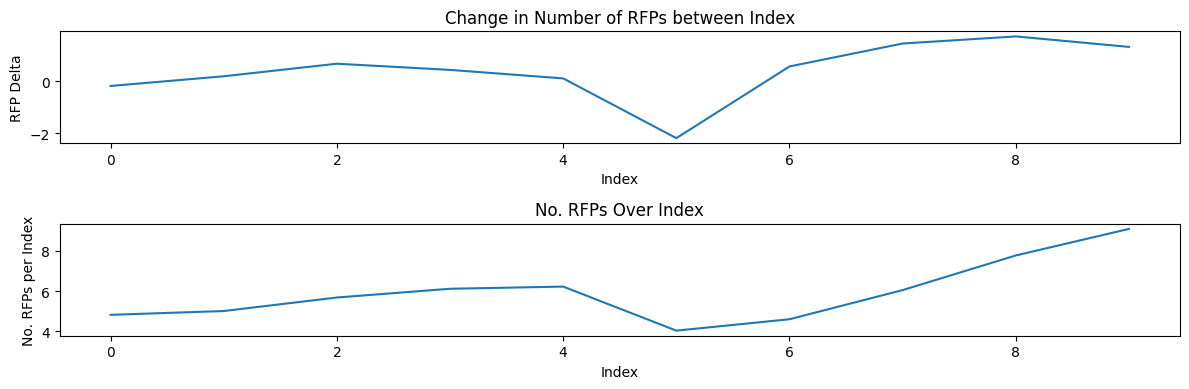

In [37]:
import numpy as np

n = 10

samples = np.random.normal(loc=0, scale=10, size=n)
print(samples)
import matplotlib.pyplot as plt

# CALIBRATION
prior_value = 5
values = []
deltas = []

# STEP THROUGHS
for i in range(n):
  delta = np.random.normal(loc=0, scale=1, size=n)[0]
  value = prior_value + delta

  # UPDATE
  prior_value = value
  values.append(value)
  deltas.append(delta)

# Create figure with 2 subplots (side by side)
fig, axes = plt.subplots(2, 1, figsize=(12, 4))

# Line plot
axes[0].plot(deltas)
axes[0].set_xlabel("Index")
axes[0].set_ylabel("RFP Delta")
axes[0].set_title("Change in Number of RFPs between Index")

axes[1].plot(values)
axes[1].set_xlabel("Index")
axes[1].set_ylabel("No. RFPs per Index")
axes[1].set_title("No. RFPs Over Index")

plt.tight_layout()
plt.show()

## Try to Make the Applicant



In [ ]:
# Applicant:
# - They can only apply to so many RFPs per month
# - They have a hit rate

## Try to Make the RFP

Behaviour:

- RFPs have a delay between closing date
- RFPs have a failure or success based on the hit rate
  - If they are successful, they will clear the gate between time
  - If they are unsucessful, there is a probability they will be told they made it to a new round.

In [ ]:
import numpy as np

class Rfp():
  "Simple Model with only 1 round after close"
  def __init__(self, id, start_t):
    self.id = id
    self.open = True

    self.start_t = start_t
    self.open_duration = 0.5
    self.close_duration = 0.5

    self.close_t = start_t + self.open_duration
    self.resolved_t = start_t + self.open_duration + self.close_duration

    # self.p_told_a_candidate = 0.5

    self.hit_rate = None
    self.success = None

  def close(self):
    self.open = False

  # def told_a_candidate(self):
  #   return np.random.choice([True, False], p=[self.p_told_a_candidate])

  def apply_to_rfp(self, hit_rate):
    self.hit_rate = hit_rate
    self.success = np.random.choice([True, False], p=[hit_rate])

class Rfp_Manager():
  def __init__(self, 1, 1):
    self.rfps = []
    self.id = 0

  def add_rfp(self):
    rfp = Rfp(self.id)
    self.rfps.append(rfp)
    self.id += 1

  def close_rfp(self, rfp_id):
    for rfp in self.rfps:
      if rfp.id == rfp_id:
        rfp.close()

  def apply_to_rfp(self, rfp_id, hit_rate):
    for rfp in self.rfps:
      if rfp.id == rfp_id:


  def assess_if_new_rfp(self, prob_of_rfp = 0.5):
    "Has a probability of generating a new RFP."
    new_rfp = np.random.choice([True, False], p=[prob_of_rfp])
    if new_rfp:
      print("New RFP")
      self.add_rfp()
    else:
      print("No RFP")



class Worker():
  __init__(self, hit_rate):
    self.hit_rate = hit_rate

  def submit_proposal():


class Simulation():
